In [16]:
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np 
import warnings
import glob 
import os 

# Make NumPy printouts easier to read.
np.set_printoptions(precision=5, suppress=True)
warnings.filterwarnings("ignore")

print(tf.__version__)

2.10.0


In [17]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [18]:
def custom_scheduler(epoch, lr):
    if epoch < 4:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


def build_and_compile_model_input(k):
      model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(512, activation='relu', input_shape=(k,)),
          tf.keras.layers.Dense(256, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(64, activation='relu'),
          # tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(1,activation='linear') 
    ])

      model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                    loss="mse",
                    metrics=['mae'])
      return model

scheduler = LearningRateScheduler(custom_scheduler)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1)
callbacks = [scheduler, tensorboard]

EPOCHS = 40
BATCH_SIZE=64

DATASET_CALOSC=pd.read_csv('../Dane/data_nowe/dane_przetworzone/12_wybranych/plik_1.csv')


FileNotFoundError: [Errno 2] No such file or directory: '../Dane/data_nowe/dane_przetworzone/12_wybranych/plik_1.csv'

In [ ]:
input_3_plot=np.arange(0,100,100/1440) 
input_3=np.vstack((2*np.ones_like(input_3_plot, dtype=int),2*np.ones_like(input_3_plot, dtype=int),input_3_plot)).T

In [ ]:
DATASET_CALOSC

,Pora_roku,Dzien_tygodnia,Czas_dnia,Przeplyw,Tyg_zuzycie
0,2,1,0.000000,0.0,627.5
1,2,1,0.000694,0.0,627.5
2,2,1,0.001389,0.0,627.5
3,2,1,0.002083,0.0,627.5
4,2,1,0.002778,0.0,627.5
...,...,...,...,...,...
161275,1,7,0.996528,0.0,907.5
161276,1,7,0.997222,0.0,907.5
161277,1,7,0.997917,0.0,907.5
161278,1,7,0.998611,0.0,907.5


In [ ]:
DATASET_CALOSC.dtypes

Pora_roku           int64
Dzien_tygodnia      int64
Czas_dnia         float64
Przeplyw          float64
Tyg_zuzycie       float64
dtype: object

In [ ]:
dataset = DATASET_CALOSC
dataset=dataset.drop(columns="Tyg_zuzycie")
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")
y=y.drop(columns="Pora_roku")

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_calosc_danych_bez_dodatku =build_and_compile_model_input(3)
model_calosc_danych_bez_dodatku.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=callbacks)
# model_calosc_danych_bez_dodatku.save("../Modele/11_12_testowanie/model_calosc_bez_dodatku")

Epoch 1/40
2016/2016 [==============================] - 8s 4ms/step - loss: 0.7021 - mae: 0.1633 - lr: 0.0010
Epoch 2/40
2016/2016 [==============================] - 9s 5ms/step - loss: 0.6998 - mae: 0.1646 - lr: 0.0010
Epoch 3/40
2016/2016 [==============================] - 8s 4ms/step - loss: 0.6989 - mae: 0.1646 - lr: 0.0010
Epoch 4/40
2016/2016 [==============================] - 10s 5ms/step - loss: 0.6980 - mae: 0.1647 - lr: 0.0010
Epoch 5/40
2016/2016 [==============================] - 9s 5ms/step - loss: 0.6964 - mae: 0.1639 - lr: 9.0484e-04
Epoch 6/40
2016/2016 [==============================] - 8s 4ms/step - loss: 0.6948 - mae: 0.1632 - lr: 8.1873e-04
Epoch 7/40
2016/2016 [==============================] - 9s 5ms/step - loss: 0.6928 - mae: 0.1638 - lr: 7.4082e-04
Epoch 8/40
2016/2016 [==============================] - 8s 4ms/step - loss: 0.6919 - mae: 0.1649 - lr: 6.7032e-04
Epoch 9/40
2016/2016 [==============================] - 9s 5ms/step - loss: 0.6902 - mae: 0.1636 - lr: 

45/45 [==============================] - 0s 1ms/step


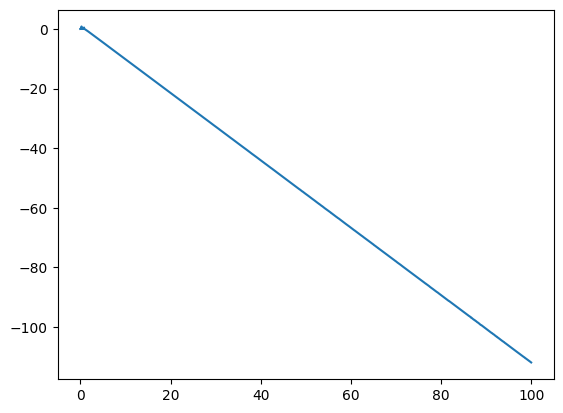

In [ ]:
flow_time_plot=np.arange(0,100,100/1440) 
flow_time=np.vstack((1*np.ones_like(flow_time_plot, dtype=int),1*np.ones_like(flow_time_plot),flow_time_plot)).T
flow_result = model_calosc_danych_bez_dodatku.predict(flow_time)

plt.plot(flow_time_plot, flow_result)

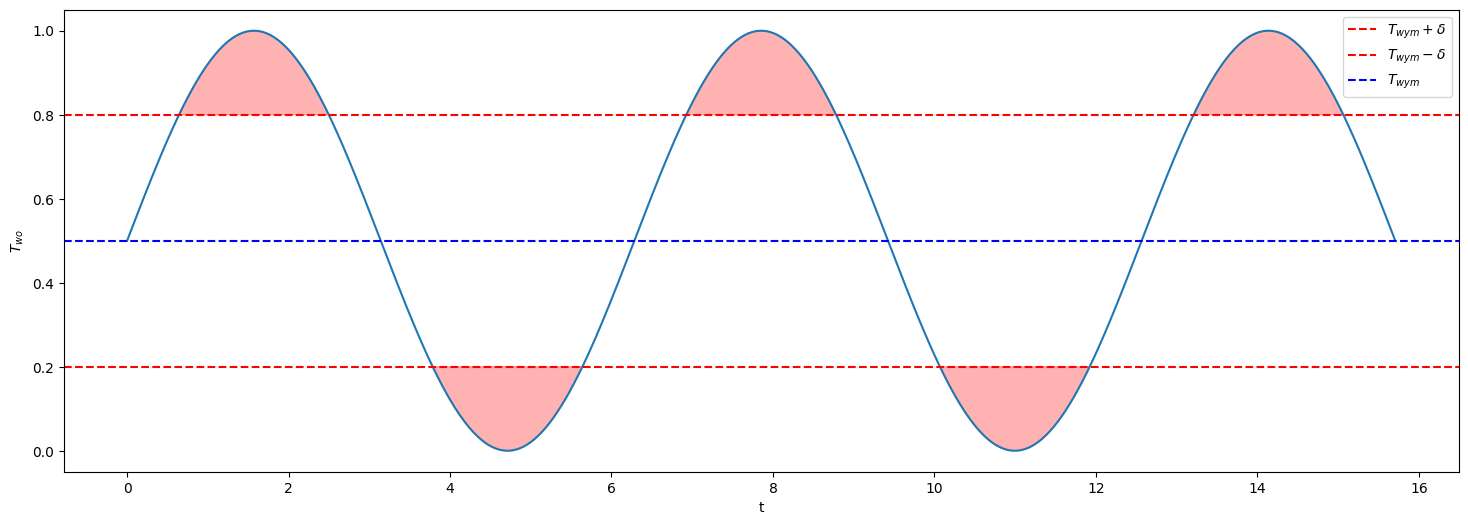

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Przykładowa funkcja - możesz dostosować według własnych potrzeb
def funkcja(x):
    return np.sin(x)/2+0.5  # Przykładowa funkcja sinusoidalna

# Definicja funkcji stałych
stała_dolna = 0.2
stała_górna = 0.8

# Zakres wartości x
x = np.linspace(0, 5 * np.pi, 1000)

# Przebieg funkcji
y = funkcja(x)

# Tworzenie wykresu
plt.figure(figsize=(18, 6))

# Rysowanie przebiegu funkcji
plt.plot(x, y,)

# Rysowanie funkcji stałych
plt.axhline(y=stała_dolna, color='r', linestyle='--', label='$T_{wym} + \delta $')
plt.axhline(y=stała_górna, color='r', linestyle='--', label='$T_{wym} - \delta $')
plt.axhline(y=(stała_górna+stała_dolna)/2, color='b', linestyle='--', label='$T_{wym}$')

# Wypełnienie obszarów pomiędzy funkcją a funkcjami stałymi
plt.fill_between(x, y, stała_dolna, where=(y < stała_dolna), color='red', alpha=0.3)
plt.fill_between(x, y, stała_górna, where=(y > stała_górna), color='red', alpha=0.3)

# Dodanie etykiet i legendy

plt.ylabel('$T_{wo}$')
plt.xlabel('t')
plt.legend()

# Pokazanie wykresu
plt.show()



